In [47]:
import xesmf  as xe
import xarray as xr
import numpy  as np
import pandas as pd
import os
import yaml
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

working_directory = '/home/veilleux/Projet/Projet_SACHR/analyses_and_figures'
yml_file = working_directory + '/config.yml'
stream = open(yml_file,'r')
config = yaml.safe_load(stream)

In [49]:
#Step 0 GEM path to set lat and lon in cartopy
ncfile = config['GEM5']['step0'].replace('pm2013010100_00000000p.nc','dm2013010100_00000000p.nc')
# Get lat, lon and cartopy_projection_object
ds     = xr.open_dataset(ncfile)        # Dataframe from the netcdf file
ps     = ds['P0'].values

print(ps)
print("ncfile : ",ncfile)
print('\n')
print("pref :", pref)

[[[1009.8921  1009.93896 1009.9624  ...  870.05615  850.3218   848.86865]
  [1010.0093  1010.05615 1010.06396 ...  823.6577   836.68115  860.79834]
  [1010.103   1010.1577  1010.1655  ...  822.0718   871.49365  917.54834]
  ...
  [1011.54834 1012.5405  1011.93896 ...  983.603    983.2046   981.79834]
  [ 995.5952  1000.36084 1000.2046  ...  983.54834  981.68115  976.6343 ]
  [ 986.2749   990.8921   986.7046  ...  983.0874   981.31396  982.73584]]]
ncfile :  /pampa/poitras/DATA/GEM5/COSP2_NAM-11m_ERA5_GEM5_CLASS_NEWVEG_newP3-SCPF_SN_Lakes/Samples_NetCDF/COSP2_NAM-11m_ERA5_GEM5_CLASS_NEWVEG_newP3-SCPF_SN_Lakes_step0/dm2013010100_00000000p.nc


pref : 100000.0


In [50]:
def sigma_hybrid_pressure(a,b,ps,pref):
    sigma_to_p = np.zeros(len(a))
    a    = a
    b    = b
    ps   = ps
    pref = pref
    for i in range(len(a)):
        sigma_to_p[i] = math.exp(a[i]+b[i]*math.log(ps*100/pref))
        
    return sigma_to_p/100

def pressure(ps):
    ps     = ps
    a      = ds['a_2'].values
    b      = ds['b_2'].values
    pref   = ds['pref'].values
    P      = np.zeros((len(ds['level2'].values),ps.shape[1],ps.shape[2]))
     
    for i in range(ps.shape[1]):
        for j in range(ps.shape[2]):
                P[:,i,j] = sigma_hybrid_pressure(a,b,ps[0,i,j],pref)

    return P

Pressure = pressure(ps)

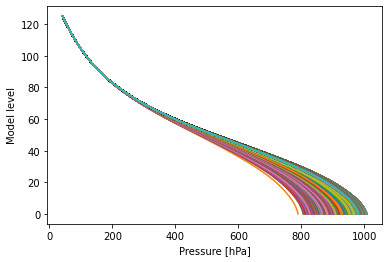

[[[  41.6267704    41.6267704    41.6267704  ...   41.62676513
     41.62676432   41.62676426]
  [  41.6267704    41.6267704    41.6267704  ...   41.6267632
     41.62676375   41.62676475]
  [  41.6267704    41.62677041   41.62677041 ...   41.62676313
     41.62676519   41.62676701]
  ...
  [  41.62677045   41.62677049   41.62677047 ...   41.62676947
     41.62676945   41.6267694 ]
  [  41.62676989   41.62677006   41.62677006 ...   41.62676946
     41.6267694    41.62676921]
  [  41.62676956   41.62676973   41.62676958 ...   41.62676945
     41.62676938   41.62676943]]

 [[  43.93246065   43.93246065   43.93246065 ...   43.93244846
     43.93244658   43.93244644]
  [  43.93246066   43.93246066   43.93246066 ...   43.93244398
     43.93244526   43.93244758]
  [  43.93246066   43.93246067   43.93246067 ...   43.93244382
     43.93244859   43.9324528 ]
  ...
  [  43.93246078   43.93246086   43.93246081 ...   43.93245849
     43.93245846   43.93245834]
  [  43.93245948   43.93245987   43.9

In [53]:
fig, ax = plt.subplots()

for i in range(555,655):
    for j in range(555,655):
        reverse = Pressure[:,i,j][::-1]
        ### with a_1, b_1 & level1 ###
        #ax.plot(reverse,np.linspace(0,63,62))
        ### with a_1, b_1 & level1 ###
        ax.plot(reverse,np.linspace(0,125,124))


ax.set_ylabel('Model level')
ax.set_xlabel('Pressure [hPa]')
plt.show()

print(Pressure)
print(np.nanmean(Pressure[0][0]))

In [ ]:
def sigma_hybrid(a,b,ps,pref):
    print(a,b,ps,pref)
    sigma_to_p = np.zeros(len(a))
    a    = a
    b    = b
    ps   = ps
    pref = pref
    for i in range(len(a)):
        sigma_to_p[i] = math.exp(a[i]+b[i]*math.log10(ps*100/pref))
        
    return sigma_to_p